## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [55]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [56]:
df = pd.read_csv(r'F:\Data Analysis projects\AB Testing\AnalyzeABTestResults 2/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [57]:
count_rows =  df.shape[0]
count_column = df.shape[1]
print('the num of rows    = ', count_rows)
print('the num of columns = ', count_column)

the num of rows    =  294478
the num of columns =  5


c. The number of unique users in the dataset.

In [58]:
count_unique = df['user_id'].unique()
print('count of unique users = ',len(count_unique))

count of unique users =  290584


check for duplicates by subtract count of unique users from total users count 

In [59]:
count_rows - len(count_unique) 

3894

> looks like we have 3894 duplicated user id 

d. The proportion of users converted.

In [60]:
p_converted = df['converted'].value_counts(1)[1]
print(f'propotion of converted users = {"%.2f" % (p_converted * 100)} %') 

propotion of converted users = 11.97 %


e. The number of times the `new_page` and `treatment` don't line up.

In [61]:
# query where new_page match with control
df.query('landing_page == "new_page" and group != "treatment"' ).head(2)

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0


In [62]:
np_tr = df.query('landing_page == "new_page" and group != "treatment"' ).count()[0]
print('where new page and treatment dont match = ', np_tr)

where new page and treatment dont match =  1928


In [63]:
np_old = df.query('landing_page != "new_page" and group == "treatment"' ).count()[0]
print('where old page and control didn\'t match  match = ', np_old)

where old page and control didn't match  match =  1965


In [64]:
print('sum of strange groups = ', np_tr + np_old)

sum of strange groups =  3893


f. Do any of the rows have missing values?

In [65]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [66]:
# copy the Data Frame 
df2 = df.copy(deep=True)
# drop the columns where new page maching with control
df2.drop(df2.query('landing_page == "new_page" and group != "treatment"').index,axis =0 ,inplace = True)
# drop the columns where old page maching with treatment
df2.drop(df2.query('landing_page != "new_page" and group == "treatment"').index,axis =0 ,inplace = True)


In [67]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [68]:
count_df2Users = df2['user_id'].count()
print('count of unique users in our new data frame = ',count_df2Users)

count of unique users in our new data frame =  290585


b. There is one **user_id** repeated in **df2**.  What is it?

In [69]:
df2['user_id'].duplicated().sum()

1

> there is one repeated user

c. What is the row information for the repeat **user_id**? 

In [70]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [71]:
df2.drop(df2[df2['user_id'].duplicated()].index, axis=0, inplace=True)

check for duplicates again

In [72]:
df2['user_id'].duplicated().sum()

0

> now all good about duplicates

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [73]:
# converting = 1 

probability_converting = df2['converted'].value_counts(1)[1]
print(f'p(converting) = {"%.2f" % (probability_converting*100)} %')

p(converting) = 11.96 %


b. Given that an individual was in the `control` group, what is the probability they converted?

In [74]:
# probability of converting conditional on being in control group

conv_control = df2[(df2['group']=='control') & (df2['converted']==1)].count()[0]
control = df2[df2['group']=='control'].count()[0]
p_old = "%.2f" %((conv_control/control) * 100)
print(f'p(converted|control) = {p_old} %')

p(converted|control) = 12.04 %


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [75]:
conv_new = df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)].count()[0]
total_treatment = df2[df2['group']=='treatment'].count()[0]
p_new =  "%.2f" %((conv_new/total_treatment) * 100)
print(f'p(converted|treatment) = {p_new} %')

p(converted|treatment) = 11.88 %


d. What is the probability that an individual received the new page?

In [76]:
new_page = df2['landing_page'].value_counts()[0]
old_page = df2['landing_page'].value_counts()[1]
print(f'p(new_page|landing_page) = {"%.2f" %((new_page/(new_page + old_page)) * 100)} %')



p(new_page|landing_page) = 50.01 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


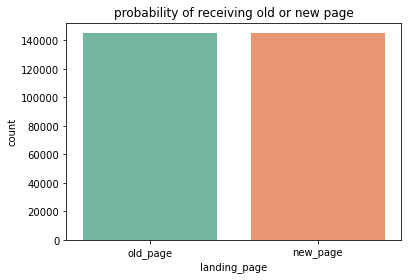

In [77]:
sns.countplot(df2['landing_page'], palette='Set2', dodge = False, ) 
plt.title('probability of receiving old or new page'); 



> the propability of receving (old & new) pages almost same


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

 >There isn't a huge difference in probabilities when it comes to which page leads to more conversions, but maybe we can tell when we do hypothesis testing.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<h3><font color='red'>Null & Alternative hypothesis looks like  </font> </h3>

<font color='red'>Null hypothesis</font> :         **p_new − p_old=0**

<font color='red'>Alternative hypothesis</font>  : **p_new − pold≠0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [78]:
p_new = np.array([df2['converted']==1]).mean()
print(f'p_new under the null  = {"%.2f" % (p_new * 100)} %')


p_new under the null  = 11.96 %


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [79]:
p_old = np.array([df2['converted']==1]).mean()
print(f'p_old under the null  = {"%.2f" % (p_old * 100)} %')


p_old under the null  = 11.96 %


> **attention please** 

>p_new | p_old under the null hypothesis we assume there is no diffrence between them

c. What is $n_{new}$?

In [80]:
new_page

145310

d. What is $n_{old}$?

In [81]:
old_page

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [82]:

def conversion_by_page(data, landing_page) : 
    
    """
    function for filtering data by converted page 
    
    Args : 
    data = The data Frame used in feltering
    landing_page = old_page or new page

    Returns : 
    the mean of array(contains all conversions by chooesed landing page )

    """
    x = data[data['landing_page'] == str(landing_page)]['converted'].mean()
    return x

In [83]:
new_page_converted = conversion_by_page(df2, 'new_page')
new_page_converted

0.11880806551510564

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [84]:
old_page_converted =  conversion_by_page(df2, 'old_page')
old_page_converted

0.1203863045004612

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [85]:
obs_diff = new_page_converted - old_page_converted
obs_diff

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [86]:
new_converted_simulation = np.random.binomial(new_page, p_new, 10000)/new_page
old_converted_simulation = np.random.binomial(old_page, p_old, 10000)/old_page
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

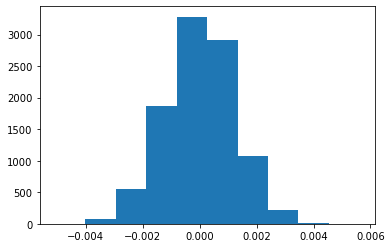

In [87]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

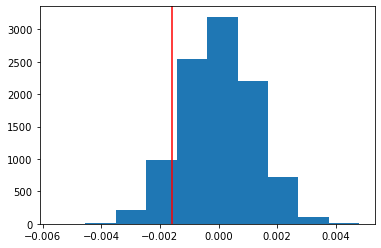

In [88]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffs), p_diffs.size)
plt.hist(null_vals)
plt.axvline(obs_diff, c='r')

In [89]:
# p value 
p_value = (p_diffs > obs_diff).mean()
print('p_value = ', p_value)

p_value =  0.9049


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>**p_value :  the probability of getting our statistic or a more extreme value if the null is true.**

>**threshold (α) = 0.5**

***our p_value here greater than the treshold so we fail to reject the Null hypothesis***


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [90]:
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [91]:
import statsmodels.api as sm
convert_old = df2.query(" landing_page == 'old_page' and converted == 1").count()[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").count()[0]
n_old = df2[df2['group'] == 'control'].count()[0]
n_new = df2[df2['group'] == 'treatment'].count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [109]:
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_val = proportions_ztest( [convert_new, convert_old], [n_new , n_old ], alternative='larger')
print(f' z-sccore = {z_stat} \n p-value  = { p_val}')

 z-sccore = -1.3109241984234394 
 p-value  = 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The z-score and p-value fail to reject the null hypothesis, and they agree with the findings in part k and part j 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Our dependent variables are categorical (0/1) so we will use a logistic regression model

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [93]:
df2[['item_passeed_error','ab_page']] = pd.get_dummies(df['group'])
df2 = df2.drop(['item_passeed_error'], axis = 1)
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [94]:
import statsmodels.api as sm
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [95]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:               8.077e-06
Time:                        13:03:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> We fail to reject the null hypothesis because the p-value is less than our threshold, 0.190. 
Part 2's p-value had a slight difference from this one
beacuse we calculated the p-value in part 2 under the null hypothesis

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> It would be great if we could add other factors to our model since missing information always affects our predictions
maybe that makes disadvantage if our factors have Multicolinearity 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [96]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [97]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [98]:
### Create the necessary dummy variables
df_new[['us', 'uk', 'ca']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop(columns = ['us','country' ], axis=1)
df_new.head()

,timestamp,group,landing_page,converted,ab_page,intercept,uk,ca
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [99]:
### Fit Your Linear Model And Obtain the Results
model_2 = sm.Logit(df_new['converted'], df_new[['intercept', 'uk', 'ca', 'ab_page']])
res_2 = model_2.fit()
print(res_2.summary())

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:               2.323e-05
Time:                        13:03:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
uk             0.0506      0.

>***Even after adding cities variables to our model, our (LLR p-value ) still  larger than our treshold and we fail to reject the null hypothesis this time.***


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [100]:
# doing interaction between recived page and country
df_new['uk_bypage'] = df_new['ab_page'] * df_new['uk']
df_new['ca_bypage'] = df_new['ab_page'] * df_new['ca']
df_new.head()

,timestamp,group,landing_page,converted,ab_page,intercept,uk,ca,uk_bypage,ca_bypage
user_id,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [101]:

model_3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','ca_bypage','uk_bypage']])
res_3 = model_3.fit()
print(res_3.summary())

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:               3.351e-05
Time:                        13:03:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0827      0.

***even after make interaction between city and page , all p values > 0.05 we fail to reject the null***

***Adding cities to our model does not make much difference***

Before conclusion i Will Check the time of the expirement

In [102]:
df['timestamp'].max(),df['timestamp'].min()



('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

<a id='conclusions'></a>
## Conclusions

* Tests were made using different methods from part 1 to part 3 and all of them led us to the same conclusion: the new page does not make more conversions than the old one.

* However, we can't be sure because these data only cover 22 days of the experiment and that's not enough to make disicion about the new page  

* i suggest run the experiment longer to make decision 
### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

### Resources

* Practical statistics for data scientist (Book)
* StatQuest (youtube)
* Brandon Foltz (youtube)
